In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import missingno as msno 

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We are using whitegrid style for our seaborn plots. This is like the most basic one
sns.set_style(style = 'whitegrid')

In [ ]:
Members = pd.read_csv('/content/drive/My Drive/HealthChallenge/Members.csv', sep=",")
Members.tail(2)

,MemberID,AgeAtFirstClaim,Sex
112998,92806272,50-59,F
112999,81827173,40-49,F


In [ ]:
Claims = pd.read_csv('/content/drive/My Drive/HealthChallenge/Claims.csv', sep=",")
Claims.tail(2)

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
2668988,96393713,7094351.0,347045.0,93075.0,Y3,Internal,Office,151,NaN,1- 2 months,METAB3,1-2,EM,0
2668989,57805129,3884005.0,523319.0,90756.0,Y1,Internal,Office,15,NaN,4- 5 months,SKNAUT,1-2,EM,0


In [ ]:
DaysInHospital_Y2 = pd.read_csv('/content/drive/My Drive/HealthChallenge/DaysInHospital_Y2.csv', sep=",")
DaysInHospital_Y2.tail(2)

,MemberID,ClaimsTruncated,DaysInHospital
76036,74032946,0,0
76037,21964521,0,0


In [ ]:
DaysInHospital_Y3 = pd.read_csv('/content/drive/My Drive/HealthChallenge/DaysInHospital_Y3.csv', sep=",")
DaysInHospital_Y3.tail(2)

,MemberID,ClaimsTruncated,DaysInHospital
71433,57283229,0,0
71434,29819036,0,0


In [ ]:
Claims_Members = reduce(lambda x,y: pd.merge(x,y, on='MemberID', how='inner'), [Claims,Members])
Claims_Members

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS,AgeAtFirstClaim,Sex
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0,80+,F
1,42286978,9416979.0,5166.0,37796.0,Y1,Internal,Office,58,NaN,9-10 months,MISCHRT,0,EM,0,80+,F
2,42286978,8511459.0,64764.0,37796.0,Y1,Internal,Office,92,NaN,0- 1 month,SKNAUT,0,EM,0,80+,F
3,42286978,8013252.0,172193.0,37796.0,Y1,Other,Office,27,NaN,0- 1 month,NEUMENT,0,MED,0,80+,F
4,42286978,9416979.0,5166.0,37796.0,Y1,Internal,Office,114,NaN,6- 7 months,GIBLEED,0,EM,0,80+,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,20215303,NaN,NaN,NaN,Y1,Other,NaN,89,NaN,0- 1 month,MISCL1,0,SGS,0,60-69,NaN
2668986,94826294,5409618.0,122401.0,5278.0,Y1,General Practice,Office,162+,NaN,0- 1 month,RESPR4,0,EM,0,10-19,F
2668987,3867712,994608.0,851052.0,31106.0,Y1,Pediatrics,Office,37,NaN,0- 1 month,RESPR4,0,EM,0,10-19,M
2668988,46279285,1464960.0,50466.0,60979.0,Y1,Pediatrics,Office,29,NaN,0- 1 month,MSC2a3,0,EM,0,10-19,F


In [ ]:
nrow, ncol = Claims_Members.shape
nrow, ncol

(2668990, 16)

In [ ]:
#Let's look at first few rows of our dataset
Claims_Members.head(3)

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS,AgeAtFirstClaim,Sex
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0,80+,F
1,42286978,9416979.0,5166.0,37796.0,Y1,Internal,Office,58,NaN,9-10 months,MISCHRT,0,EM,0,80+,F
2,42286978,8511459.0,64764.0,37796.0,Y1,Internal,Office,92,NaN,0- 1 month,SKNAUT,0,EM,0,80+,F


In [ ]:
Claims_Members.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668990 entries, 0 to 2668989
Data columns (total 16 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 object
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
AgeAtFirstClaim          object
Sex                      object
dtypes: float64(3), int64(2), object(11)
memory usage: 346.2+ MB


In [ ]:
Claims_Members['MemberID'].unique()

array([42286978, 97903248,  2759427, ...,  3867712, 46279285, 40389320])

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['MemberID'].unique())

113000

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['MemberID'].nunique()

113000

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['MemberID'].isnull().sum()

0

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['MemberID'].isnull().sum()/ nrow).round(3)*100

0.0

In [ ]:
Claims_Members['ProviderID'].unique()

array([8013252., 9416979., 8511459., ..., 7676407., 6547259., 4875461.])

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['ProviderID'].unique())

14700

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['ProviderID'].nunique()

14699

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['ProviderID'].isnull().sum()

16264

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['ProviderID'].isnull().sum()/ nrow).round(3)*100

0.6

In [ ]:
Claims_Members['Vendor'].unique()

array([172193.,   5166.,  64764., ..., 246285., 898618., 663092.])

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['Vendor'].unique())

6388

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['Vendor'].nunique()

6387

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['Vendor'].isnull().sum()

24856

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['Vendor'].isnull().sum()/ nrow).round(3)*100

0.8999999999999999

In [ ]:
Claims_Members['PCP'].unique()

array([37796.,  5300., 91972., ..., 49539., 19128., 85137.])

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['PCP'].unique())

1360

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['PCP'].nunique()

1359

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['PCP'].isnull().sum()

7492

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['PCP'].isnull().sum()/ nrow).round(3)*100

0.3

In [ ]:
Claims_Members['Year'].unique()

array(['Y1', 'Y3', 'Y2'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['Year'].unique())

3

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['Year'].nunique()

3

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['Year'].isnull().sum()

0

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['Year'].isnull().sum()/ nrow).round(3)*100

0.0

In [ ]:
Claims_Members['Specialty'].unique()

array(['Surgery', 'Internal', 'Other', nan, 'Laboratory',
       'General Practice', 'Diagnostic Imaging', 'Pathology',
       'Anesthesiology', 'Emergency', 'Obstetrics and Gynecology',
       'Rehabilitation', 'Pediatrics'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['Specialty'].unique())

13

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['Specialty'].nunique()

12

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['Specialty'].isnull().sum()

8405

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['Specialty'].isnull().sum()/ nrow).round(3)*100

0.3

In [ ]:
Claims_Members['PlaceSvc'].unique()

array(['Office', 'Outpatient Hospital', 'Independent Lab',
       'Inpatient Hospital', 'Urgent Care', 'Other', nan, 'Ambulance',
       'Home'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['PlaceSvc'].unique())

9

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['PlaceSvc'].nunique()

8

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['PlaceSvc'].isnull().sum()

7632

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['PlaceSvc'].isnull().sum()/ nrow).round(3)*100

0.3

In [ ]:
Claims_Members['PayDelay'].unique()

array(['28', '58', '92', '27', '114', '34', '32', '62', '50', '9', '0',
       '43', '22', '80', '17', '33', '31', '85', '24', '83', '48', '8',
       '71', '68', '35', '36', '3', '19', '39', '38', '51', '117', '57',
       '29', '12', '49', '11', '42', '56', '64', '37', '21', '46', '116',
       '162+', '70', '18', '41', '135', '105', '23', '144', '84', '55',
       '14', '66', '16', '45', '63', '67', '30', '15', '86', '44', '52',
       '59', '73', '53', '25', '149', '158', '60', '65', '81', '79',
       '154', '100', '88', '26', '20', '54', '47', '77', '69', '61', '91',
       '120', '13', '132', '143', '104', '125', '87', '98', '6', '74',
       '108', '160', '140', '138', '106', '153', '90', '107', '99', '10',
       '130', '2', '78', '82', '122', '137', '40', '103', '109', '150',
       '101', '72', '112', '128', '115', '127', '93', '110', '76', '102',
       '75', '129', '97', '141', '118', '89', '148', '94', '111', '134',
       '156', '126', '119', '142', '5', '4', '131', '121

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['PayDelay'].unique())

163

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['PayDelay'].nunique()

163

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['PayDelay'].isnull().sum()

0

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['PayDelay'].isnull().sum()/ nrow).round(3)*100

0.0

In [ ]:
#Replace 162+ by 162 and convert to integer
Claims_Members['PayDelay'].replace('162+','162',inplace=True)
Claims_Members['PayDelay'] = Claims_Members['PayDelay'].astype('int64')
Claims_Members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2668990 entries, 0 to 2668989
Data columns (total 16 columns):
MemberID                 int64
ProviderID               float64
Vendor                   float64
PCP                      float64
Year                     object
Specialty                object
PlaceSvc                 object
PayDelay                 int64
LengthOfStay             object
DSFS                     object
PrimaryConditionGroup    object
CharlsonIndex            object
ProcedureGroup           object
SupLOS                   int64
AgeAtFirstClaim          object
Sex                      object
dtypes: float64(3), int64(3), object(10)
memory usage: 346.2+ MB


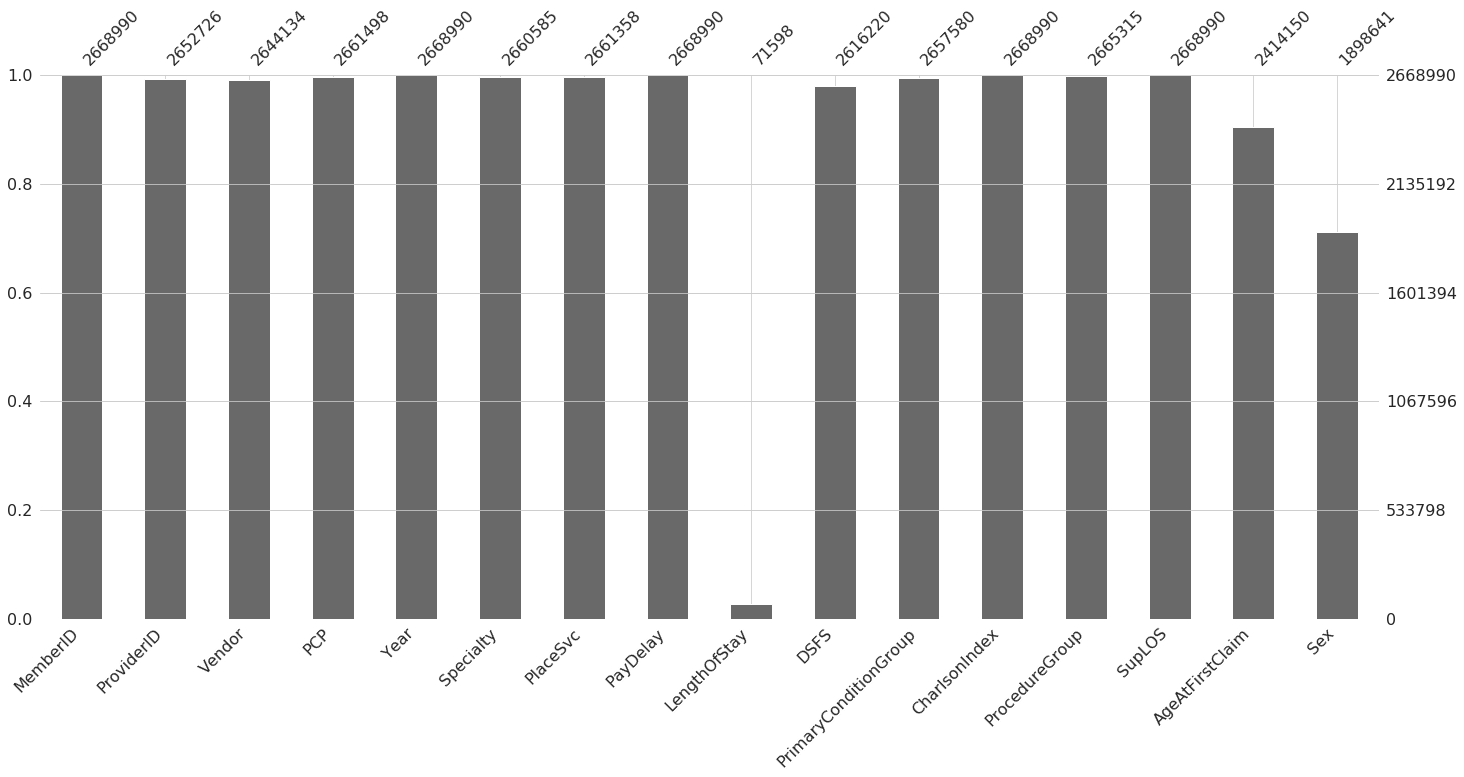

In [ ]:
msno.bar(Claims_Members) 

In [ ]:
#convert days to ranges
Claims_Members['PayDelay'] = pd.cut(Claims_Members['PayDelay'], [0,10,20,30, 40,50, 60,70, 80,90, 100,110, 120,130, 140,150, 163], include_lowest=True)

In [ ]:
Claims_Members['LengthOfStay'].unique()

array([nan, '1 day', '3 days', '5 days', '2 days', '6 days', '1- 2 weeks',
       '2- 4 weeks', '4 days', '4- 8 weeks', '26+ weeks'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['LengthOfStay'].unique())

11

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['LengthOfStay'].nunique()

10

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['LengthOfStay'].isnull().sum()

2597392

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['LengthOfStay'].isnull().sum()/ nrow).round(3)*100

97.3

In [ ]:
#Drop Column
Claims_Members=Claims_Members.drop(['LengthOfStay'], axis=1)
Claims_Members.head(1)

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS,AgeAtFirstClaim,Sex
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,"(20.0, 30.0]",8- 9 months,NEUMENT,0,MED,0,80+,F


In [ ]:
Claims_Members['DSFS'].unique()

array(['8- 9 months', '9-10 months', '0- 1 month', '6- 7 months',
       '1- 2 months', '7- 8 months', '10-11 months', '3- 4 months',
       '5- 6 months', '2- 3 months', '11-12 months', '4- 5 months', nan],
      dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['DSFS'].unique())

13

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['DSFS'].nunique()

12

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['DSFS'].isnull().sum()

52770

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['DSFS'].isnull().sum()/ nrow).round(3)*100

2.0

In [ ]:
Claims_Members['PrimaryConditionGroup'].unique()

array(['NEUMENT', 'MISCHRT', 'SKNAUT', 'GIBLEED', 'MSC2a3', 'ODaBNCA',
       'METAB3', 'ARTHSPIN', 'HEMTOL', 'PNEUM', 'CANCRA', 'CATAST',
       'RESPR4', 'GYNEC1', 'INFEC4', 'FXDISLC', 'COPD', 'UTI', 'TRAUMA',
       'ROAMI', 'MISCL5', 'FLaELEC', 'SEIZURE', 'GYNECA', 'CHF', nan,
       'PNCRDZ', 'APPCHOL', 'AMI', 'HEART2', 'CANCRB', 'RENAL3', 'SEPSIS',
       'GIOBSENT', 'HEART4', 'METAB1', 'PERVALV', 'RENAL2', 'HIPFX',
       'STROKE', 'MISCL1', 'PRGNCY', 'LIVERDZ', 'CANCRM', 'RENAL1',
       'PERINTL'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['PrimaryConditionGroup'].unique())

46

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['PrimaryConditionGroup'].nunique()

45

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['PrimaryConditionGroup'].isnull().sum()

11410

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['PrimaryConditionGroup'].isnull().sum()/ nrow).round(3)*100

0.4

In [ ]:
Claims_Members['PrimaryConditionGroup'].unique()

array(['NEUMENT', 'MISCHRT', 'SKNAUT', 'GIBLEED', 'MSC2a3', 'ODaBNCA',
       'METAB3', 'ARTHSPIN', 'HEMTOL', 'PNEUM', 'CANCRA', 'CATAST',
       'RESPR4', 'GYNEC1', 'INFEC4', 'FXDISLC', 'COPD', 'UTI', 'TRAUMA',
       'ROAMI', 'MISCL5', 'FLaELEC', 'SEIZURE', 'GYNECA', 'CHF', nan,
       'PNCRDZ', 'APPCHOL', 'AMI', 'HEART2', 'CANCRB', 'RENAL3', 'SEPSIS',
       'GIOBSENT', 'HEART4', 'METAB1', 'PERVALV', 'RENAL2', 'HIPFX',
       'STROKE', 'MISCL1', 'PRGNCY', 'LIVERDZ', 'CANCRM', 'RENAL1',
       'PERINTL'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['PrimaryConditionGroup'].unique())

46

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['PrimaryConditionGroup'].nunique()

45

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['PrimaryConditionGroup'].isnull().sum()

11410

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['PrimaryConditionGroup'].isnull().sum()/ nrow).round(3)*100

0.4

In [ ]:
Claims_Members['CharlsonIndex'].unique()

array(['0', '1-2', '3-4', '5+'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['CharlsonIndex'].unique())

4

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['CharlsonIndex'].nunique()

4

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['CharlsonIndex'].isnull().sum()

0

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['CharlsonIndex'].isnull().sum()/ nrow).round(3)*100

0.0

In [ ]:
Claims_Members['ProcedureGroup'].unique()

array(['MED', 'EM', 'RAD', 'SCS', 'PL', 'SIS', 'SDS', nan, 'ANES', 'SMS',
       'SRS', 'SNS', 'SGS', 'SAS', 'SEOA', 'SUS', 'SO', 'SMCD'],
      dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['ProcedureGroup'].unique())

18

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['ProcedureGroup'].nunique()

17

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['ProcedureGroup'].isnull().sum()

3675

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['ProcedureGroup'].isnull().sum()/ nrow).round(3)*100

0.1

In [ ]:
Claims_Members['SupLOS'].unique()

array([0, 1])

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['SupLOS'].unique())

2

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['SupLOS'].nunique()

2

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['SupLOS'].isnull().sum()

0

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['SupLOS'].isnull().sum()/ nrow).round(3)*100

0.0

In [ ]:
#Drop Column
Claims_Members=Claims_Members.drop(['SupLOS'], axis=1)
Claims_Members.head(1)

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,AgeAtFirstClaim,Sex
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,"(20.0, 30.0]",8- 9 months,NEUMENT,0,MED,80+,F


In [ ]:
Claims_Members['AgeAtFirstClaim'].unique()

array(['80+', '70-79', '40-49', '50-59', '10-19', nan, '60-69', '30-39',
       '20-29', '0-9'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['AgeAtFirstClaim'].unique())

10

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['AgeAtFirstClaim'].nunique()

9

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['AgeAtFirstClaim'].isnull().sum()

254840

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['AgeAtFirstClaim'].isnull().sum()/ nrow).round(3)*100

9.5

In [ ]:
Claims_Members['Sex'].unique()

array(['F', nan, 'M'], dtype=object)

In [ ]:
#Count of distinct categories in our variable. Here we have counted nan values also (if any)
len(Claims_Members['Sex'].unique())

3

In [ ]:
#Count of distinct categories in our variable but this time we don't want to count any nan values
Claims_Members['Sex'].nunique()

2

In [ ]:
#Number of Missing Values in that variable (for all the rows)
Claims_Members['Sex'].isnull().sum()

770349

In [ ]:
#Percentage of Missing Values in that variable
(Claims_Members['Sex'].isnull().sum()/ nrow).round(3)*100

In [ ]:
values = {'ProviderID':'UnknownProviderID', 'Vendor': 'UnkownVendor', 'PCP': "UnknownPCP", 'Specialty': 'UnknownSpecialty', 'PlaceSvc': 'UnknownPlaceSvc', 'PrimaryConditionGroup': 'UnknownPrimaryConditionGroup', 'ProcedureGroup': 'UnknownProcedureGroup','DSFS':'no-month'}
Claims_Members = Claims_Members.fillna(value=values)
Claims_Members

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,AgeAtFirstClaim,Sex
0,42286978,8.01325e+06,172193,37796,Y1,Surgery,Office,"(20.0, 30.0]",8- 9 months,NEUMENT,0,MED,80+,F
1,42286978,9.41698e+06,5166,37796,Y1,Internal,Office,"(50.0, 60.0]",9-10 months,MISCHRT,0,EM,80+,F
2,42286978,8.51146e+06,64764,37796,Y1,Internal,Office,"(90.0, 100.0]",0- 1 month,SKNAUT,0,EM,80+,F
3,42286978,8.01325e+06,172193,37796,Y1,Other,Office,"(20.0, 30.0]",0- 1 month,NEUMENT,0,MED,80+,F
4,42286978,9.41698e+06,5166,37796,Y1,Internal,Office,"(110.0, 120.0]",6- 7 months,GIBLEED,0,EM,80+,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,20215303,UnknownProviderID,UnkownVendor,UnknownPCP,Y1,Other,UnknownPlaceSvc,"(80.0, 90.0]",0- 1 month,MISCL1,0,SGS,60-69,NaN
2668986,94826294,5.40962e+06,122401,5278,Y1,General Practice,Office,"(150.0, 163.0]",0- 1 month,RESPR4,0,EM,10-19,F
2668987,3867712,994608,851052,31106,Y1,Pediatrics,Office,"(30.0, 40.0]",0- 1 month,RESPR4,0,EM,10-19,M
2668988,46279285,1.46496e+06,50466,60979,Y1,Pediatrics,Office,"(20.0, 30.0]",0- 1 month,MSC2a3,0,EM,10-19,F


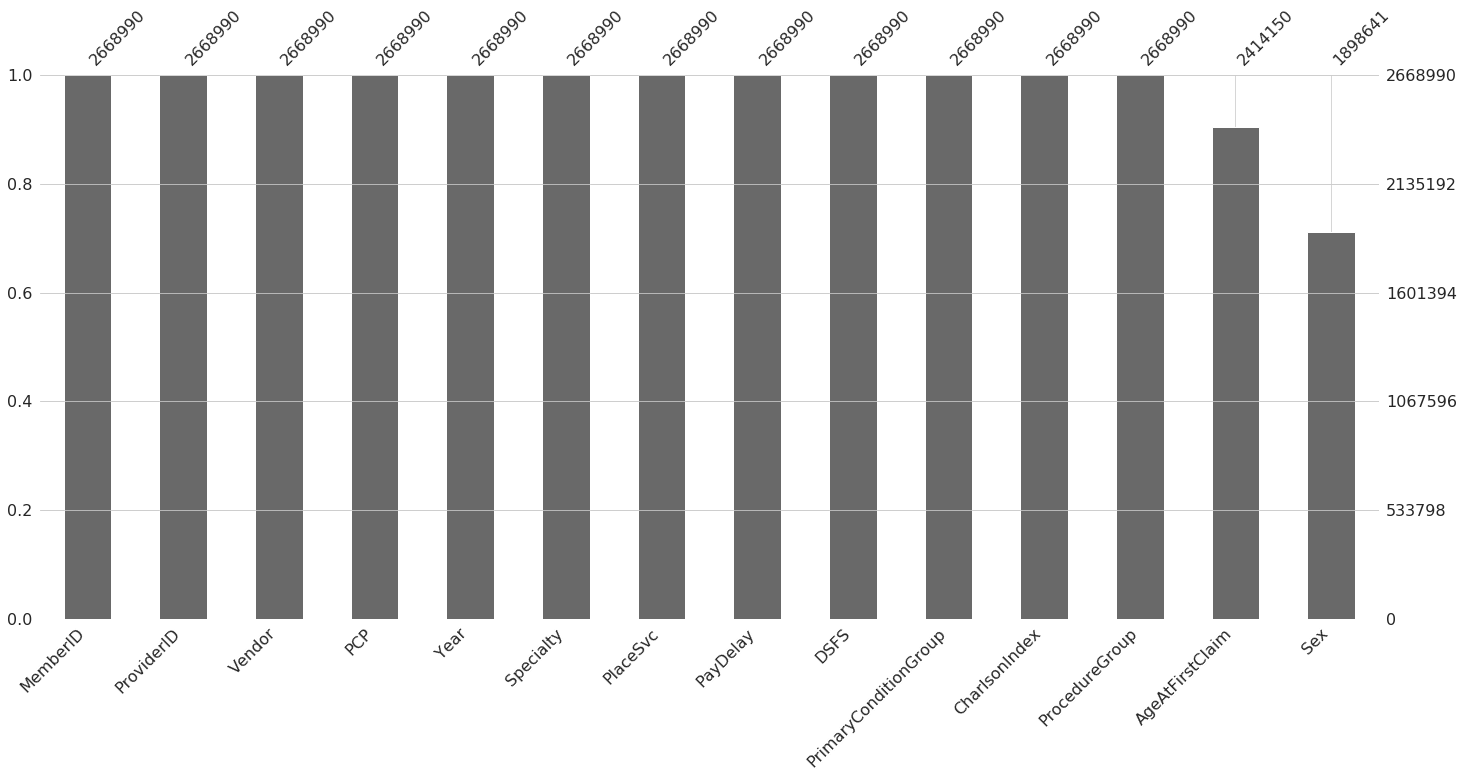

In [ ]:
msno.bar(Claims_Members) 

In [ ]:
duplicate_rows_df = Claims_Members[Claims_Members.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (154779, 14)


In [ ]:
Claims_Members.count() 

MemberID                 2668990
ProviderID               2652726
Vendor                   2644134
PCP                      2661498
Year                     2668990
Specialty                2660585
PlaceSvc                 2661358
PayDelay                 2668990
LengthOfStay               71598
DSFS                     2616220
PrimaryConditionGroup    2657580
CharlsonIndex            2668990
ProcedureGroup           2665315
SupLOS                   2668990
AgeAtFirstClaim          2414150
Sex                      1898641
dtype: int64

In [ ]:
#Remove Duplicates
Claims_Members = Claims_Members.drop_duplicates()
Claims_Members.head(5)

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,AgeAtFirstClaim,Sex
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,"(20.0, 40.0]",8- 9 months,NEUMENT,0,MED,80+,F
1,42286978,9416979.0,5166.0,37796.0,Y1,Internal,Office,"(40.0, 60.0]",9-10 months,MISCHRT,0,EM,80+,F
2,42286978,8511459.0,64764.0,37796.0,Y1,Internal,Office,"(80.0, 100.0]",0- 1 month,SKNAUT,0,EM,80+,F
3,42286978,8013252.0,172193.0,37796.0,Y1,Other,Office,"(20.0, 40.0]",0- 1 month,NEUMENT,0,MED,80+,F
4,42286978,9416979.0,5166.0,37796.0,Y1,Internal,Office,"(100.0, 120.0]",6- 7 months,GIBLEED,0,EM,80+,F


In [ ]:
#Claims by Sex each year
pd.crosstab(Claims_Members.Year, Claims_Members.Sex)

Sex,F,M
Year,,
Y1,347852,244289
Y2,351994,241669
Y3,359451,246616


In [ ]:
pd.crosstab(Claims_Members.Sex, Claims_Members.PayDelay)

PayDelay,"(-0.001, 20.0]","(20.0, 40.0]","(40.0, 60.0]","(60.0, 80.0]","(80.0, 100.0]","(100.0, 120.0]","(120.0, 140.0]","(140.0, 163.0]"
Sex,,,,,,,,
F,203914,453459,191768,87441,42150,22927,12678,44960
M,144906,319756,131927,57663,26488,14462,8206,29166


In [ ]:
f_obs = np.array([pd.crosstab(Claims_Members.Sex, Claims_Members.PayDelay).iloc[0].values,
                  pd.crosstab(Claims_Members.Sex, Claims_Members.PayDelay).iloc[1].values])
f_obs
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(532.8756928643103, 6.823479342746299e-111, 7)

In [ ]:
#Observe that there are even after removing Pregnancy related claims, 1 million more Females obtained medical services than males each year
pd.crosstab(Claims_Members.Year, Claims_Members.PrimaryConditionGroup)

PrimaryConditionGroup,AMI,APPCHOL,ARTHSPIN,CANCRA,CANCRB,CANCRM,CATAST,CHF,COPD,FLaELEC,FXDISLC,GIBLEED,GIOBSENT,GYNEC1,GYNECA,HEART2,HEART4,HEMTOL,HIPFX,INFEC4,LIVERDZ,METAB1,METAB3,MISCHRT,MISCL1,MISCL5,MSC2a3,NEUMENT,ODaBNCA,PERINTL,PERVALV,PNCRDZ,PNEUM,PRGNCY,RENAL1,RENAL2,RENAL3,RESPR4,ROAMI,SEIZURE,SEPSIS,SKNAUT,STROKE,TRAUMA,UTI
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Y1,10913,5687,83229,1263,11961,233,492,3704,13665,1713,11673,32698,3321,13323,2783,16387,8581,8765,1233,26717,808,1254,103861,38234,1507,14346,159517,53088,13761,173,977,266,3284,10217,106,2492,16013,44461,15093,6375,104,32343,2552,22258,13450
Y2,11253,6064,87827,1807,14055,304,561,4724,14453,1674,11938,33027,3131,14972,4188,16523,9095,10253,1378,26625,941,1210,106497,41519,1611,15614,155644,55023,16115,223,1068,197,3408,9803,155,3591,17345,43074,16457,6542,134,34287,2549,21306,14771
Y3,10461,5555,88509,1873,13343,390,598,4095,14181,1607,11516,32220,2711,14978,4066,16504,9487,10210,1198,25895,942,1262,101731,46838,1516,16878,157736,57369,15886,245,1161,302,3531,9366,198,4147,17400,44581,14951,6763,153,36094,2299,20569,14904


In [ ]:
pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.PrimaryConditionGroup)

PrimaryConditionGroup,AMI,APPCHOL,ARTHSPIN,CANCRA,CANCRB,CANCRM,CATAST,CHF,COPD,FLaELEC,FXDISLC,GIBLEED,GIOBSENT,GYNEC1,GYNECA,HEART2,HEART4,HEMTOL,HIPFX,INFEC4,LIVERDZ,METAB1,METAB3,MISCHRT,MISCL1,MISCL5,MSC2a3,NEUMENT,ODaBNCA,PERINTL,PERVALV,PNCRDZ,PNEUM,PRGNCY,RENAL1,RENAL2,RENAL3,RESPR4,ROAMI,SEIZURE,SEPSIS,SKNAUT,STROKE,TRAUMA,UTI
CharlsonIndex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7526,10108,152027,0,5638,0,388,468,1915,2043,24463,57220,6159,33871,0,19061,7442,11756,1708,49232,8,316,98586,62611,2869,28531,285024,90111,26505,573,1234,310,4372,27089,106,163,27301,82515,21214,10434,122,49725,1,45343,26421
1-2,24085,7037,104066,4653,31620,538,1229,11416,39587,2833,10400,39420,2920,9226,10522,29179,19095,16706,2037,27514,2585,3248,201178,61659,1715,17760,180073,72348,18506,67,1909,428,5662,2295,311,8538,22465,48471,24575,8992,263,50585,7136,18218,16235
3-4,968,112,3102,202,1560,7,31,604,731,101,221,1116,57,153,296,1080,584,693,57,2427,89,149,11778,2110,39,468,6811,2751,560,1,60,27,175,2,38,1437,876,1003,641,220,5,2245,249,495,430
5+,48,49,370,88,541,382,3,35,66,17,43,189,27,23,219,94,42,73,7,64,9,13,547,211,11,79,989,270,191,0,3,0,14,0,4,92,116,127,71,34,1,169,14,77,39


In [ ]:
f_obs = np.array([pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.PrimaryConditionGroup).iloc[0].values,
                  pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.PrimaryConditionGroup).iloc[1].values,
                  pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.PrimaryConditionGroup).iloc[2].values,
                  pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.PrimaryConditionGroup).iloc[3].values])
f_obs
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(357769.2532667249, 0.0, 132)

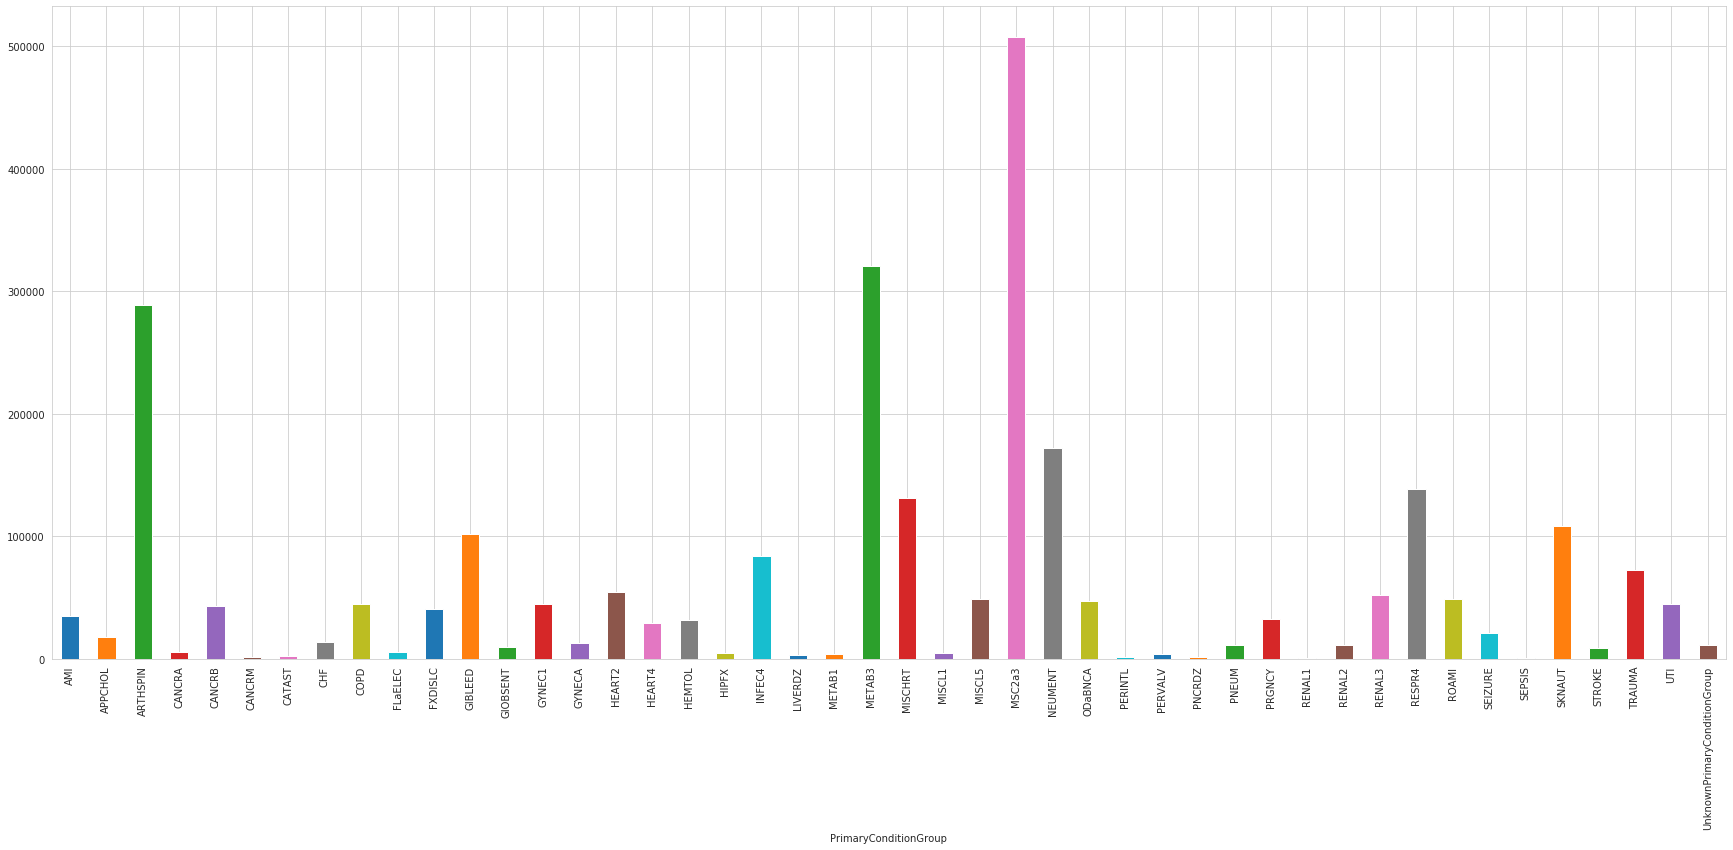

In [ ]:
pd.crosstab(Claims_Members.PrimaryConditionGroup, Claims_Members.PrimaryConditionGroup).plot.bar(figsize=(30,12),stacked = True, legend=False)  

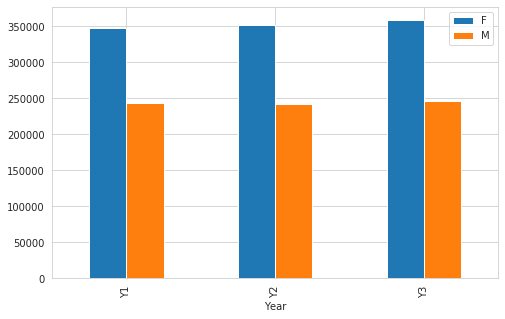

In [ ]:
pd.crosstab(Claims_Members.Year, Claims_Members.Sex).plot.bar(figsize=(8,5)).legend(loc=1, prop={'size': 10})  

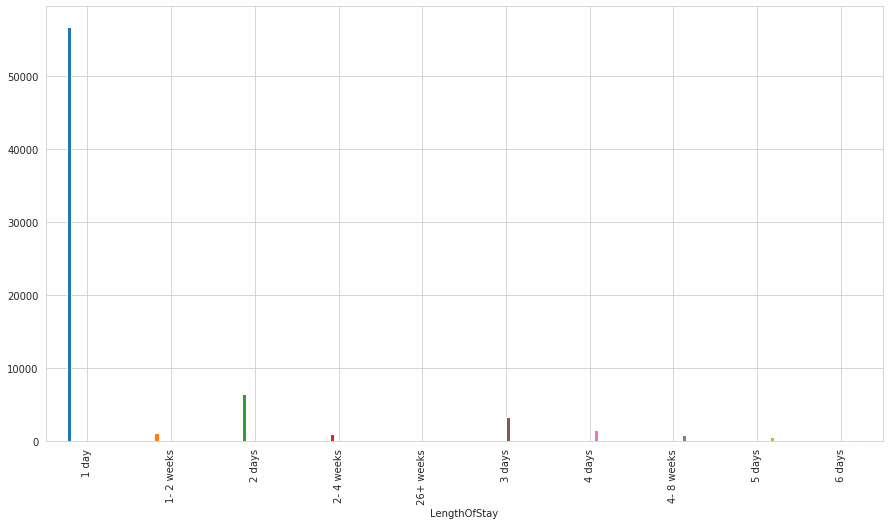

In [ ]:
pd.crosstab(Claims_Members.LengthOfStay, Claims_Members.LengthOfStay).plot.bar(figsize=(15,8), legend = False)

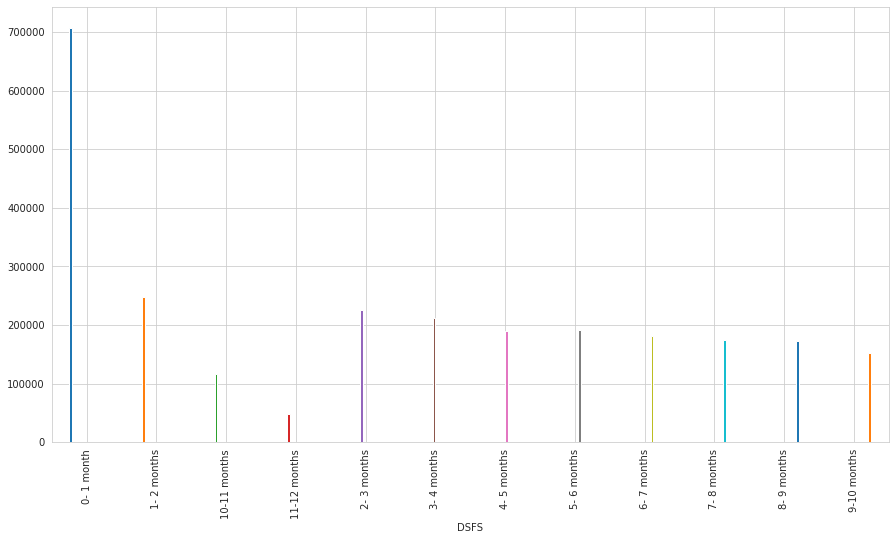

In [ ]:
pd.crosstab(Claims_Members.DSFS, Claims_Members.DSFS).plot.bar(figsize=(15,8), legend =False)

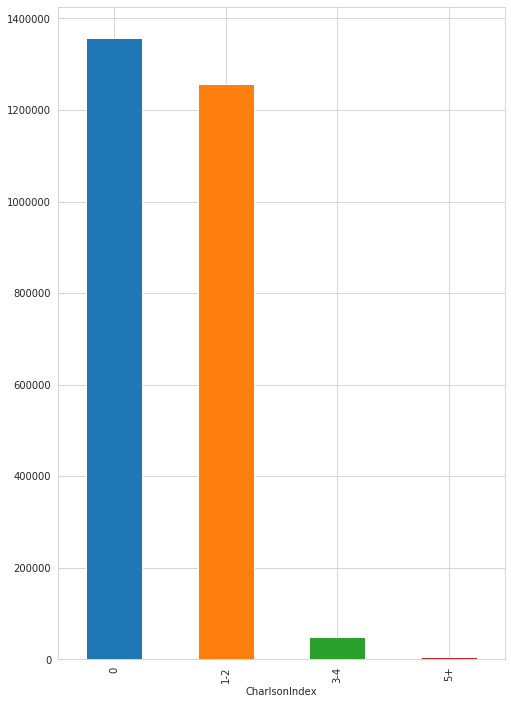

In [ ]:
pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.CharlsonIndex).plot.bar(figsize=(8,12),stacked =True, legend =False)

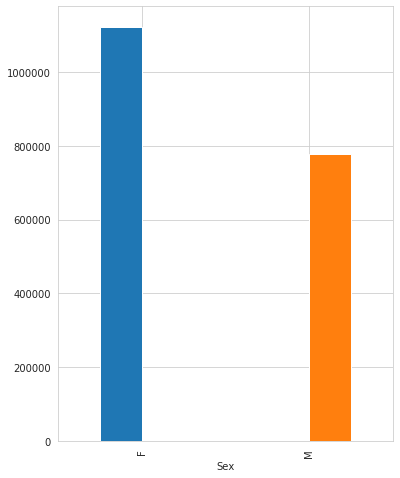

In [ ]:
pd.crosstab(Claims_Members.Sex, Claims_Members.Sex).plot.bar(figsize=(6,8), legend =False)

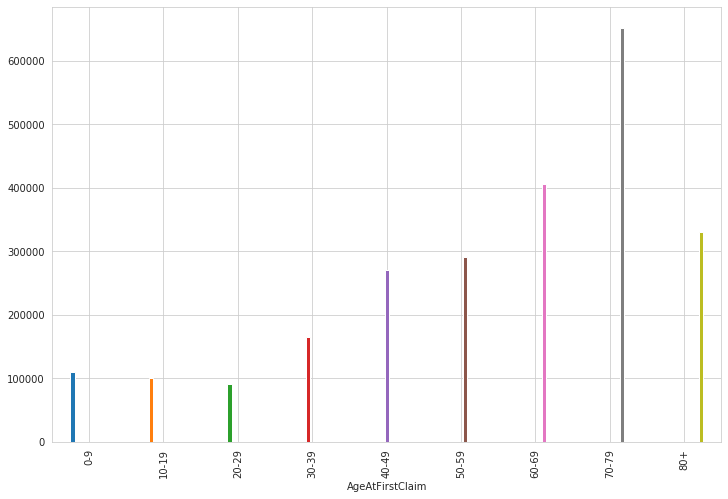

In [ ]:
pd.crosstab(Claims_Members.AgeAtFirstClaim, Claims_Members.AgeAtFirstClaim).plot.bar(figsize=(12,8), legend =False)

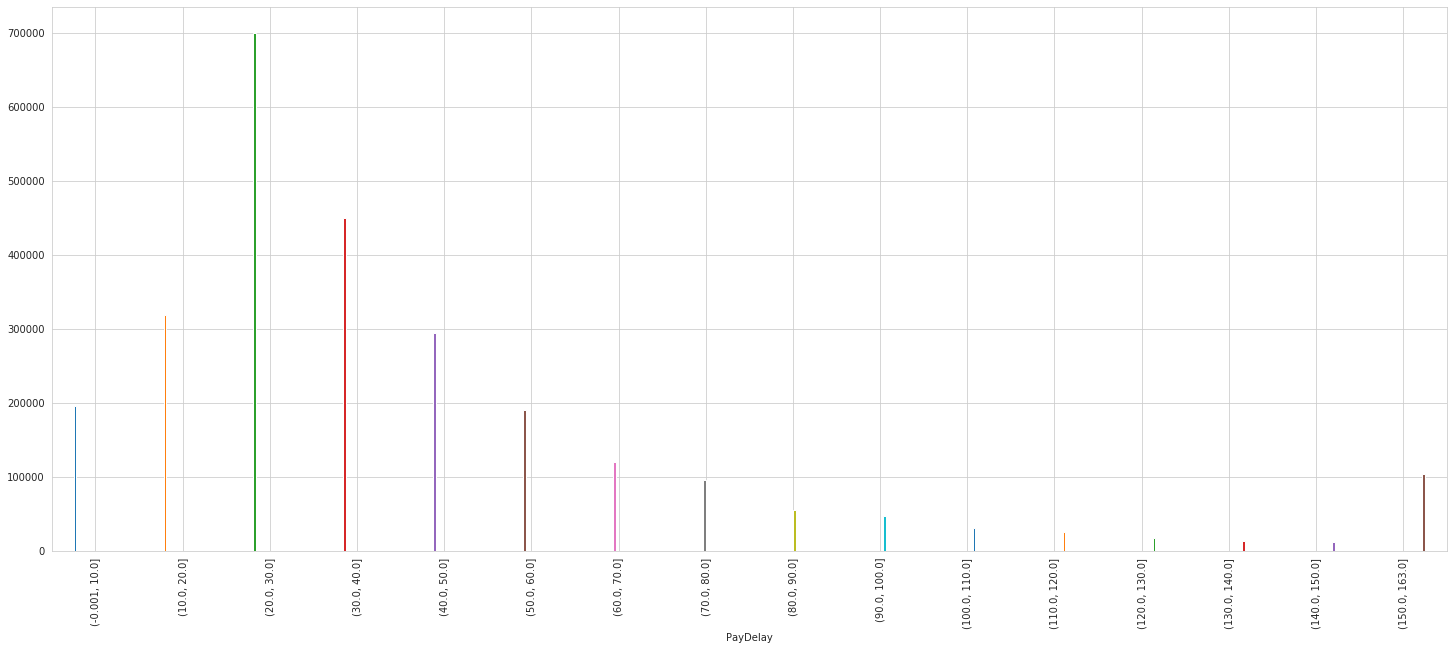

In [ ]:
pd.crosstab(Claims_Members.PayDelay, Claims_Members.PayDelay).plot.bar(figsize=(25,10), legend =False)

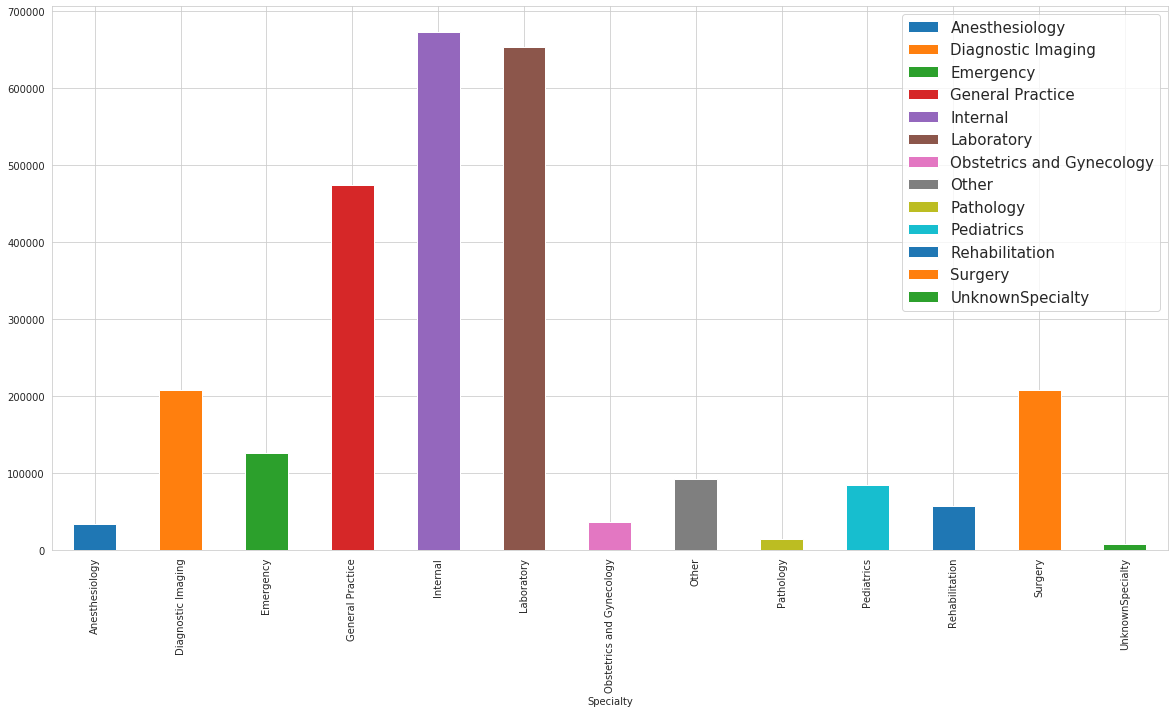

In [ ]:
pd.crosstab(Claims_Members.Specialty, Claims_Members.Specialty).plot.bar(figsize=(20,10), stacked =True).legend(loc=1, prop={'size': 15})

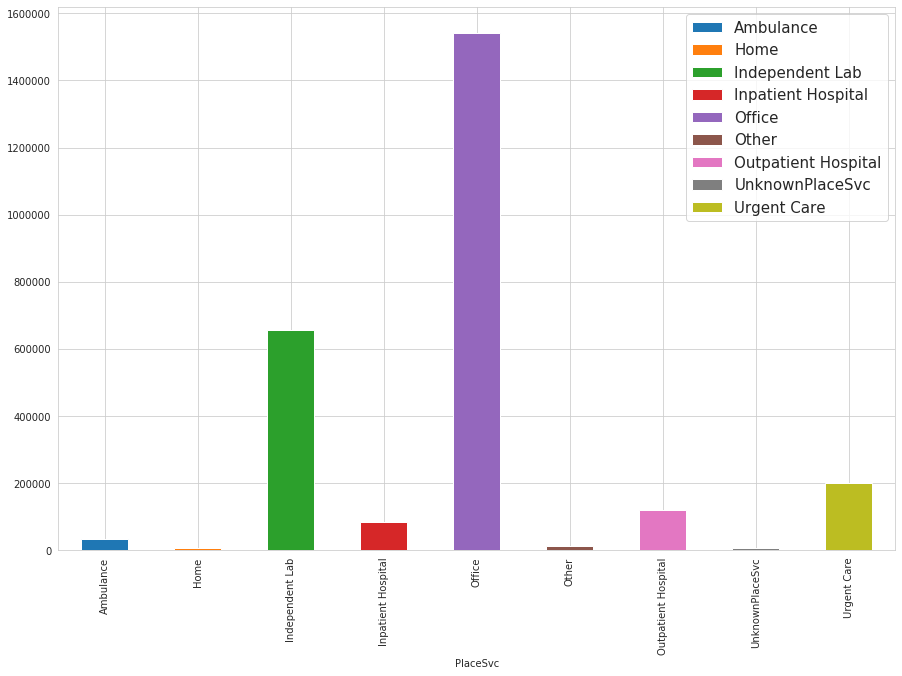

In [ ]:
pd.crosstab(Claims_Members.PlaceSvc, Claims_Members.PlaceSvc).plot.bar(figsize=(15,10), stacked = True).legend(loc=1, prop={'size': 15})

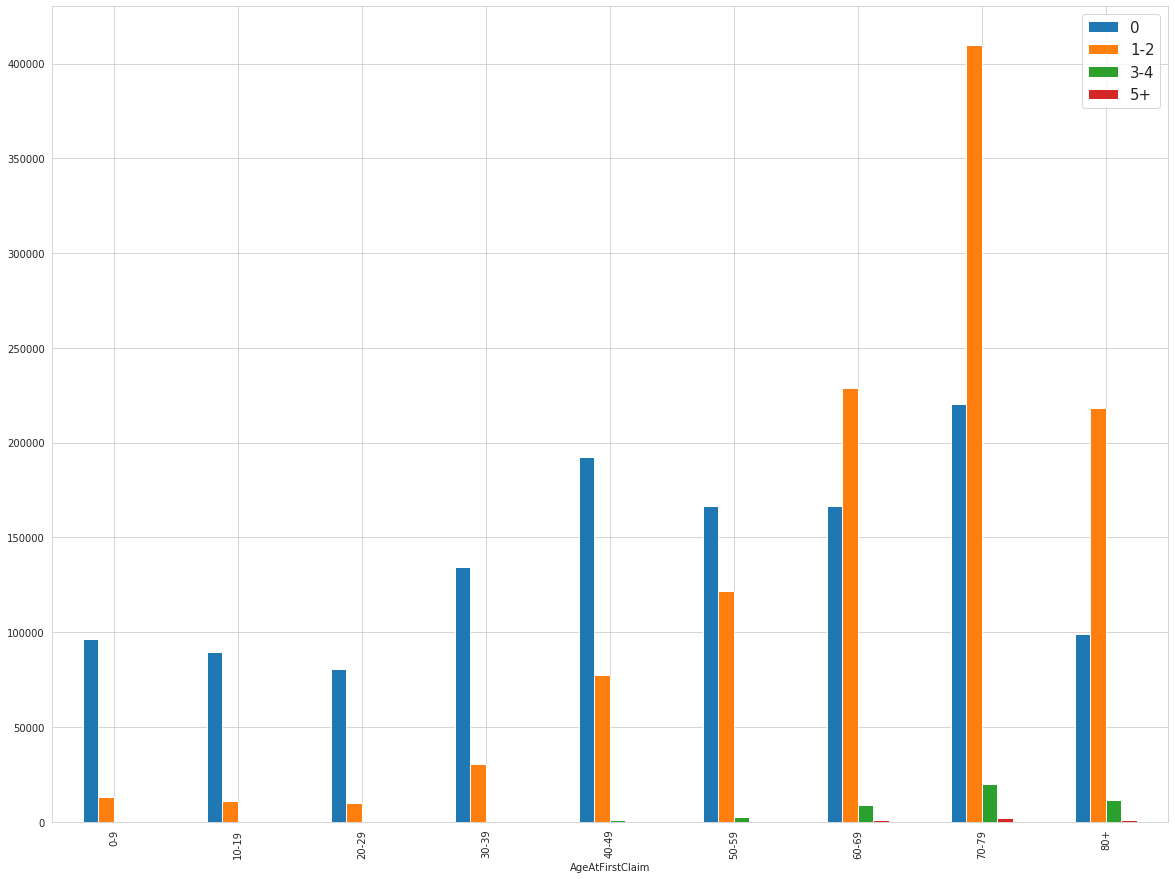

In [ ]:
pd.crosstab(Claims_Members.AgeAtFirstClaim, Claims_Members.CharlsonIndex).plot.bar(figsize=(20,15)).legend(loc=1, prop={'size': 15})

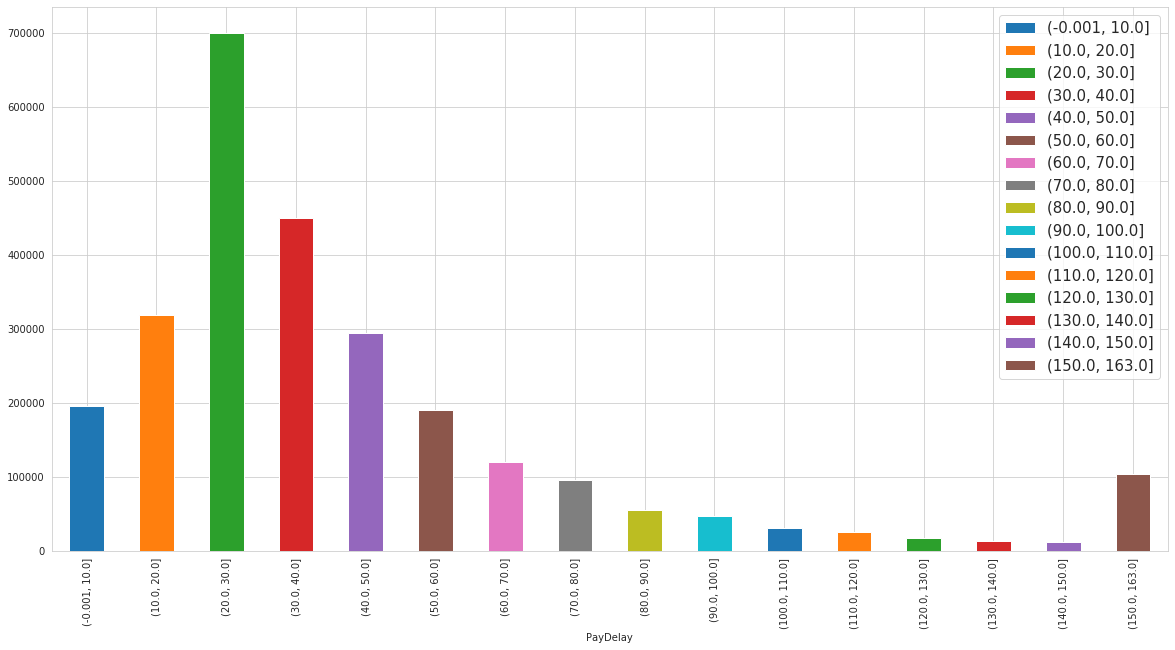

In [ ]:
pd.crosstab(Claims_Members.PayDelay, Claims_Members.PayDelay).plot.bar(figsize=(20,10),stacked = True).legend(loc=1, prop={'size': 15})

In [ ]:
pd.crosstab(Claims.PayDelay, Claims.PayDelay)

PayDelay,0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,123,124,125,126,127,128,129,13,130,131,132,133,...,63,64,65,66,67,68,69,7,70,71,72,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99
PayDelay,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,141451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,11883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,0,0,0,4499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,4742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3820,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1917,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3087,0,0


In [ ]:
#Claims by Age group each year
pd.crosstab(Claims_Members.Year, Claims_Members.AgeAtFirstClaim)

AgeAtFirstClaim,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
Year,,,,,,,,,
Y1,35069,33040,28790,51346,82436,85940,116579,199174,111809
Y2,35747,31855,27781,52000,87073,91915,127123,206251,102321
Y3,35543,31449,29346,52961,87391,96701,137278,205657,93638


In [ ]:
f_obs = np.array([pd.crosstab(Claims_Members.Year, Claims_Members.AgeAtFirstClaim).iloc[0].values,
                  pd.crosstab(Claims_Members.Year, Claims_Members.AgeAtFirstClaim).iloc[1].values,
                  pd.crosstab(Claims_Members.Year, Claims_Members.AgeAtFirstClaim).iloc[2].values])
f_obs
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(3934.419351012255, 0.0, 16)

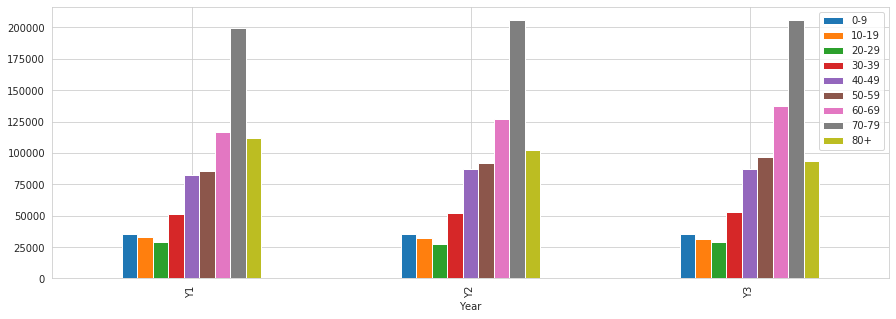

In [ ]:
pd.crosstab(Claims_Members.Year, Claims_Members.AgeAtFirstClaim).plot.bar(figsize=(15,5)).legend(loc=1, prop={'size': 10})  

In [ ]:
#Claims by Age group by Sex across years
pd.crosstab(Claims_Members.Sex, Claims_Members.AgeAtFirstClaim)

AgeAtFirstClaim,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
Sex,,,,,,,,,
F,40448,39186,46026,77533,121295,116923,164843,269756,129878
M,42726,34821,16286,40367,73583,85006,117468,202186,78151


In [ ]:
#With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'age at first claim' column.
#We don't know what this relationship is, but we do know that these two variables are not independent of each other.
f_obs = np.array([pd.crosstab(Claims_Members.Sex, Claims_Members.AgeAtFirstClaim).iloc[0].values,
                  pd.crosstab(Claims_Members.Sex, Claims_Members.AgeAtFirstClaim).iloc[1].values])
f_obs
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(15375.728148597296, 0.0, 8)

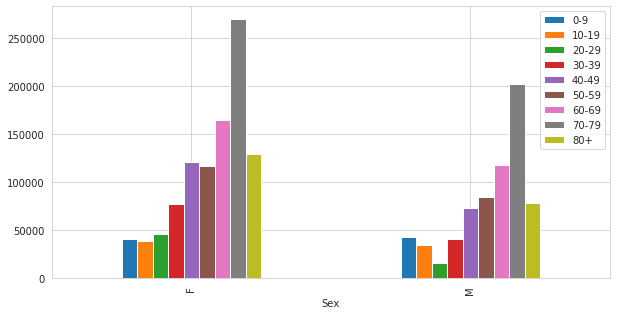

In [ ]:
pd.crosstab(Claims_Members.Sex, Claims_Members.AgeAtFirstClaim).plot.bar(figsize=(10,5)).legend(loc=1, prop={'size': 10})  

In [ ]:
#Charlson Index Sex-wise
pd.crosstab(Claims_Members.Sex, Claims_Members.CharlsonIndex)

CharlsonIndex,0,1-2,3-4,5+
Sex,,,,
F,604273,438909,14584,1531
M,372119,341684,16988,1783


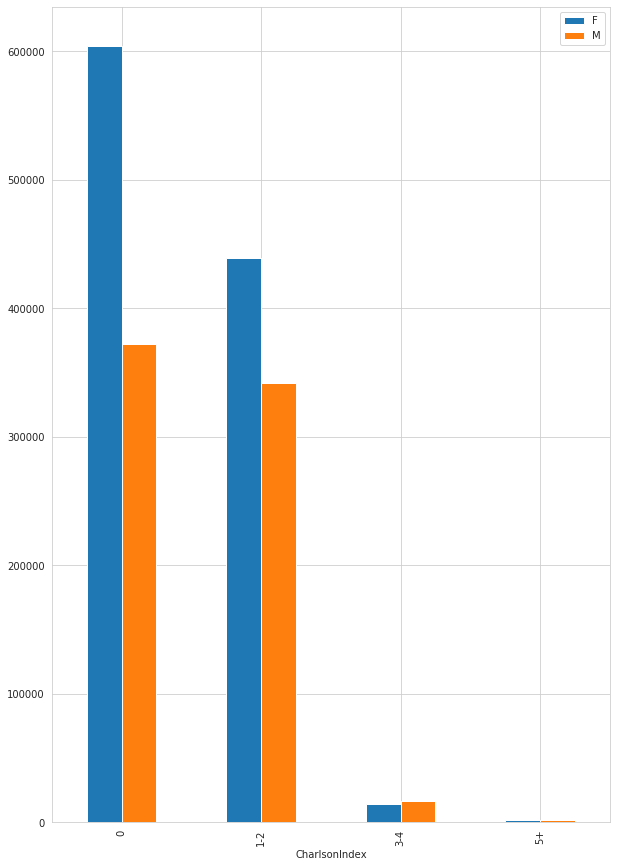

In [ ]:
pd.crosstab(Claims_Members.CharlsonIndex, Claims_Members.Sex).plot.bar(figsize=(10,15),).legend(loc=1, prop={'size': 10})  

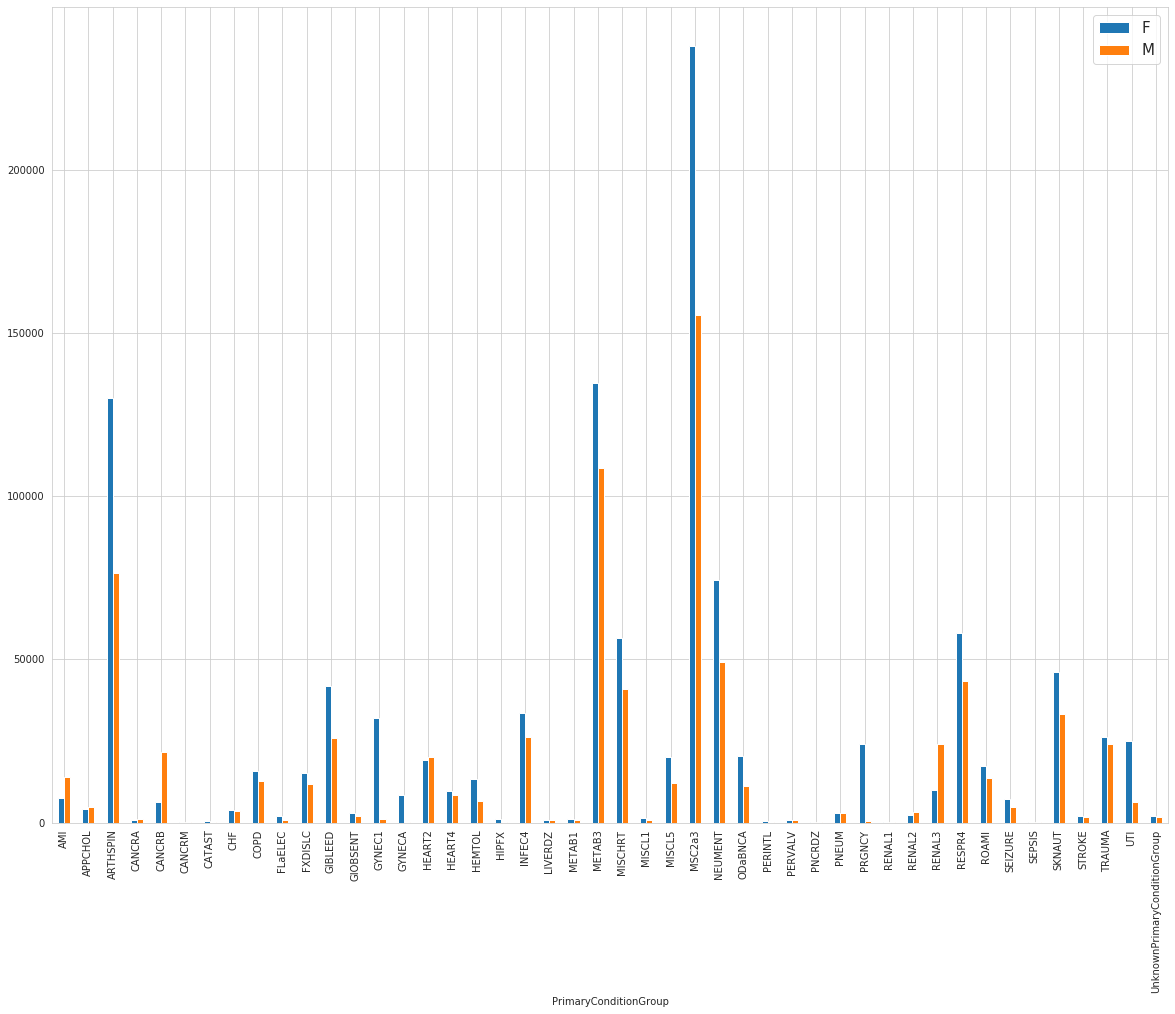

In [ ]:
pd.crosstab(Claims_Members.PrimaryConditionGroup, Claims_Members.Sex).plot.bar(figsize=(20,15)).legend(loc=1, prop={'size': 15})

In [ ]:
#With a p-value < 0.05 , we can reject the null hypothesis. There is definitely some sort of relationship between 'sex' and the 'age at first claim' column.
#We don't know what this relationship is, but we do know that these two variables are not independent of each other.
f_obs = np.array([pd.crosstab(Claims_Members.Sex, Claims_Members.PrimaryConditionGroup).iloc[0].values,
                  pd.crosstab(Claims_Members.Sex, Claims_Members.PrimaryConditionGroup).iloc[1].values])
f_obs
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(89874.53498948315, 0.0, 45)

In [ ]:
member_revisits = pd.crosstab(Claims_Members.MemberID, Claims_Members.Year)
charlson_data = pd.crosstab(Claims_Members.MemberID, Claims_Members.CharlsonIndex)
PCG_data = pd.crosstab(Claims_Members.MemberID, Claims_Members.PrimaryConditionGroup)
member_revisits_Members = reduce(lambda x,y: pd.merge(x,y, on='MemberID', how='inner'), [member_revisits,Members])
charlson = reduce(lambda x,y: pd.merge(x,y, on='MemberID', how='inner'), [member_revisits_Members,charlson_data])
PCG = reduce(lambda x,y: pd.merge(x,y, on='MemberID', how='inner'), [charlson,PCG_data])
PCG

,MemberID,Y1,Y2,Y3,AgeAtFirstClaim,Sex,0,1-2,3-4,5+,AMI,APPCHOL,ARTHSPIN,CANCRA,CANCRB,CANCRM,CATAST,CHF,COPD,FLaELEC,FXDISLC,GIBLEED,GIOBSENT,GYNEC1,GYNECA,HEART2,HEART4,HEMTOL,HIPFX,INFEC4,LIVERDZ,METAB1,METAB3,MISCHRT,MISCL1,MISCL5,MSC2a3,NEUMENT,ODaBNCA,PERINTL,PERVALV,PNCRDZ,PNEUM,PRGNCY,RENAL1,RENAL2,RENAL3,RESPR4,ROAMI,SEIZURE,SEPSIS,SKNAUT,STROKE,TRAUMA,UTI
0,4,0,1,0,0-9,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,210,8,6,4,30-39,NaN,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
2,3197,5,5,10,0-9,F,10,10,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0
3,3457,0,1,0,0-9,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3713,0,9,0,40-49,F,9,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112973,99996214,1,0,0,40-49,M,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112974,99997485,1,0,2,10-19,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
112975,99997895,14,0,0,40-49,M,14,0,0,0,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
112976,99998627,10,0,0,30-39,F,6,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
Claims_Members['ProviderID'].value_counts()

7053364.0    293866
1076052.0    143520
4107701.0    107100
321261.0      93725
8889271.0     35339
              ...  
3774215.0         1
8492719.0         1
4503053.0         1
9221656.0         1
2364159.0         1
Name: ProviderID, Length: 14700, dtype: int64

In [ ]:
Claims_Members['Vendor'].value_counts()

240043.0    293868
140343.0    193442
251809.0    143520
791272.0    133277
122401.0    127706
             ...  
192655.0         1
717081.0         1
717380.0         1
984552.0         1
736989.0         1
Name: Vendor, Length: 6388, dtype: int64

In [ ]:
Claims_Members['PCP'].value_counts()

91972.0    73772
32724.0    46724
20893.0    40845
36452.0    37898
77134.0    34155
           ...  
53880.0        1
53623.0        1
10136.0        1
99228.0        1
93014.0        1
Name: PCP, Length: 1360, dtype: int64

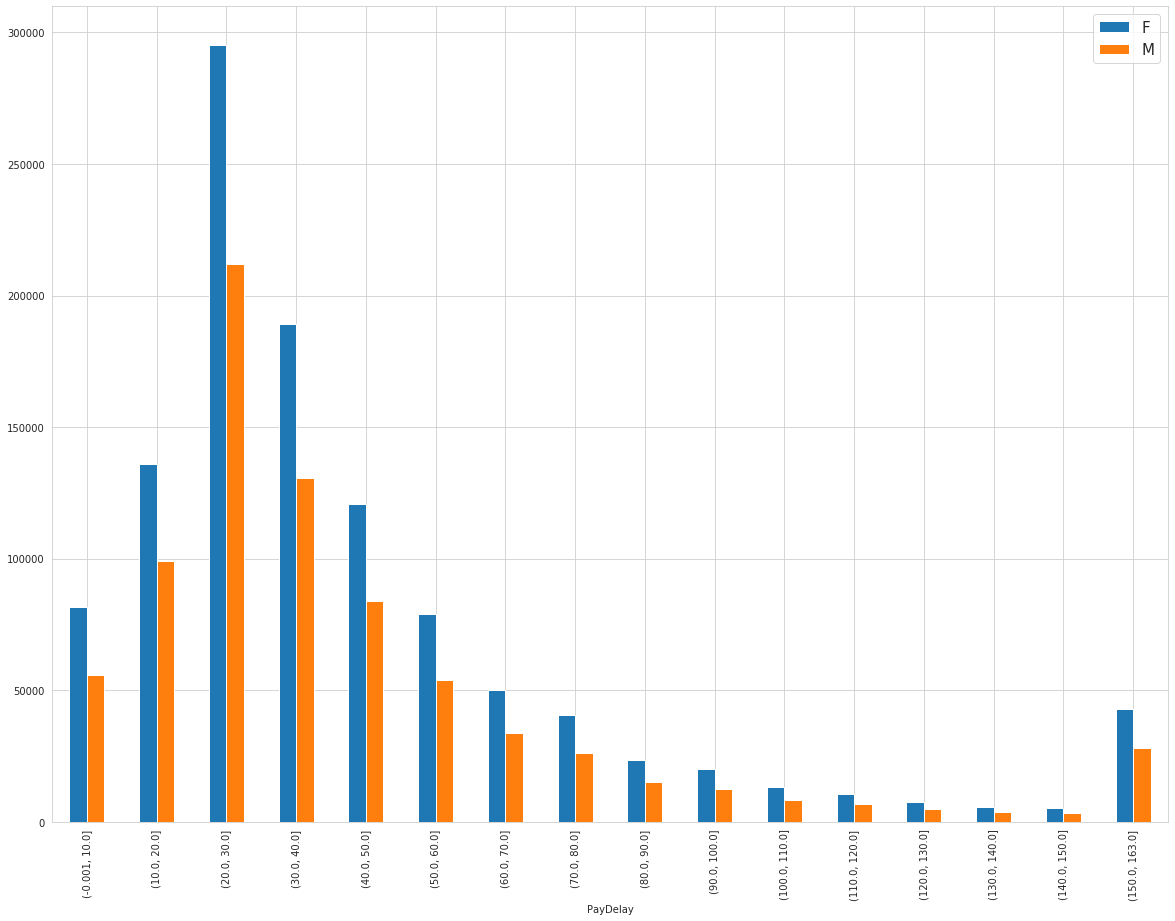

In [ ]:
pd.crosstab(Claims_Members.PayDelay, Claims_Members.Sex).plot.bar(figsize=(20,15)).legend(loc=1, prop={'size': 15})

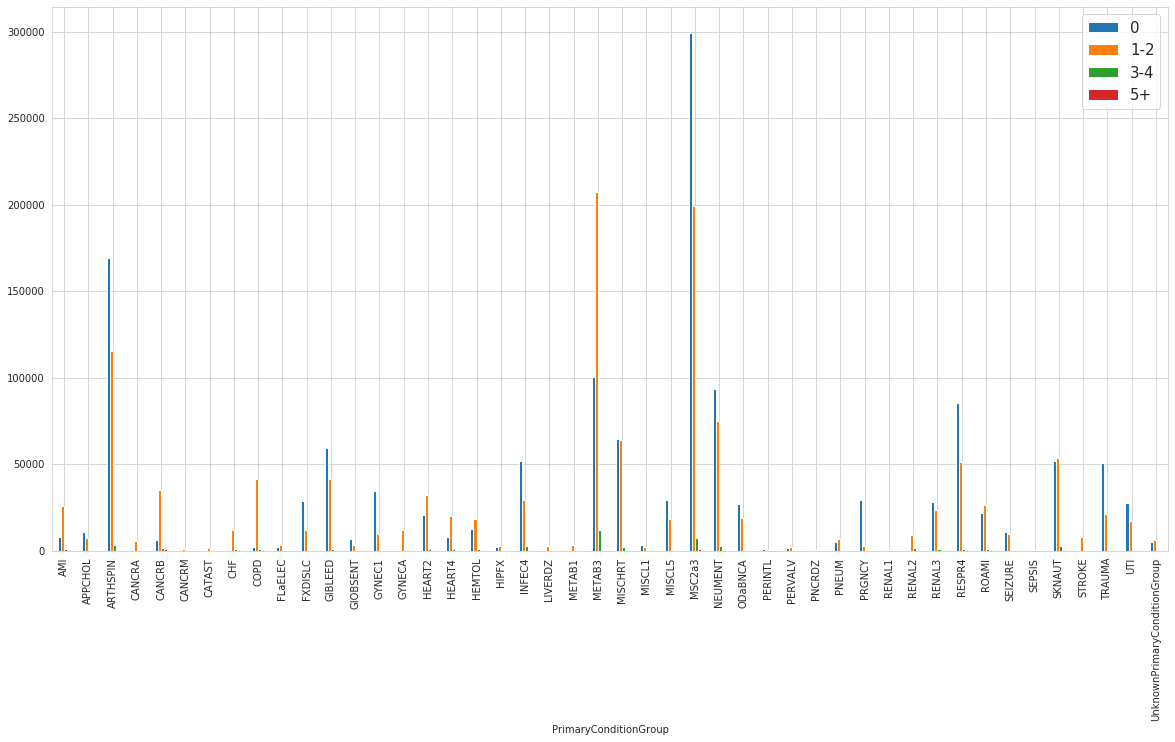

In [ ]:
pd.crosstab(Claims_Members.PrimaryConditionGroup, Claims_Members.CharlsonIndex).plot.bar(figsize=(20,10)).legend(loc=1, prop={'size': 15})

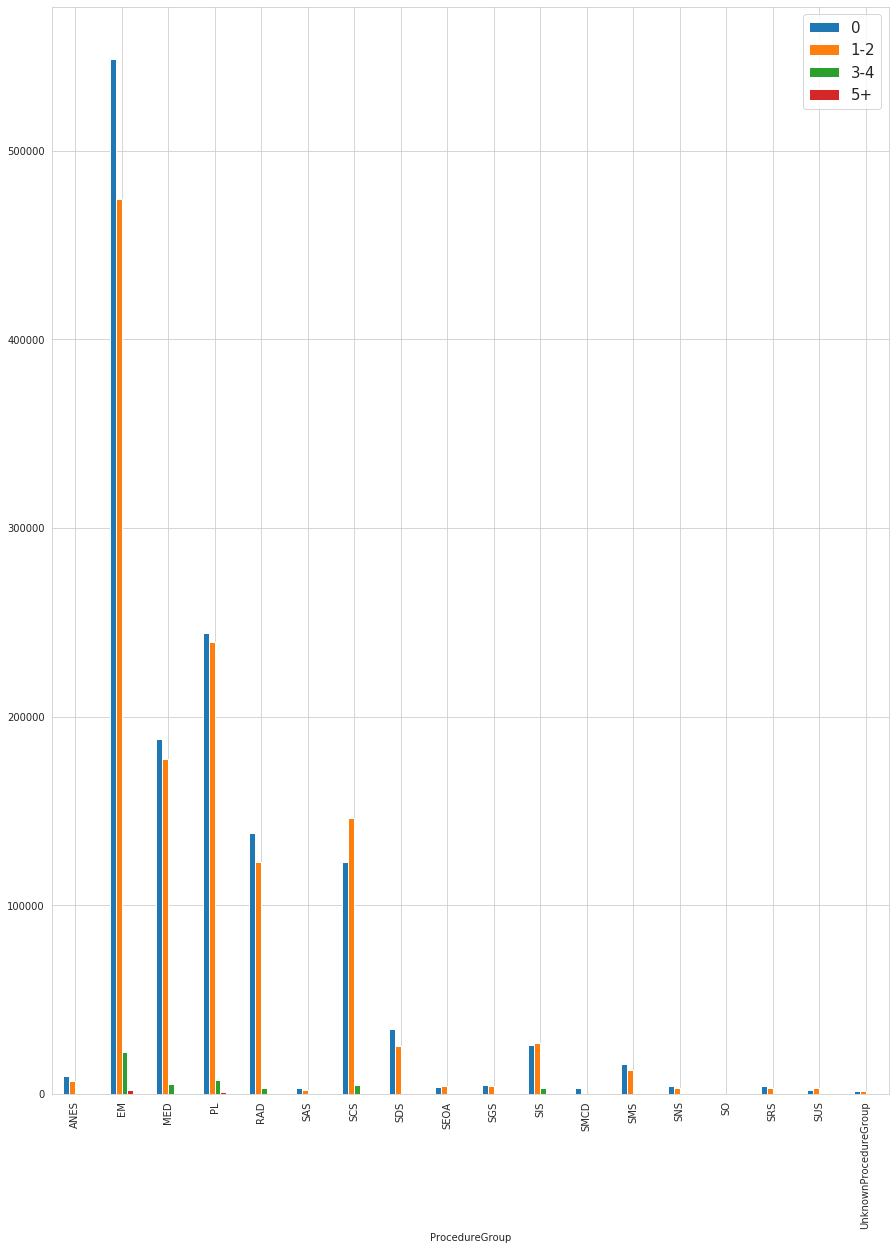

In [ ]:
pd.crosstab(Claims_Members.ProcedureGroup, Claims_Members.CharlsonIndex).plot.bar(figsize=(15,20)).legend(loc=1, prop={'size': 15})

In [ ]:
len(Claims_Members['MemberID'].loc[Claims_Members['CharlsonIndex'] == '5+'].unique())

943